# Урок 11. Jupyter Notebook и несколько слов об аналитике

In [1]:
import numpy
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

import sympy  
from sympy import symbols
from sympy import symbols, sin, cos
from sympy.plotting import plot

In [2]:
print('Определяем корни уравнения при помощи функции solveset():')
x = symbols('x')
sympy.solveset(sympy.Eq(-12*x**4*sympy.sin(sympy.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30, 0), x)

Определяем корни уравнения при помощи функции solveset():


ConditionSet(x, Eq(-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30, 0), Complexes)

Построим график функции f(x) в диапазоне Х [-100, 100] при помощи библиотеки Sympy


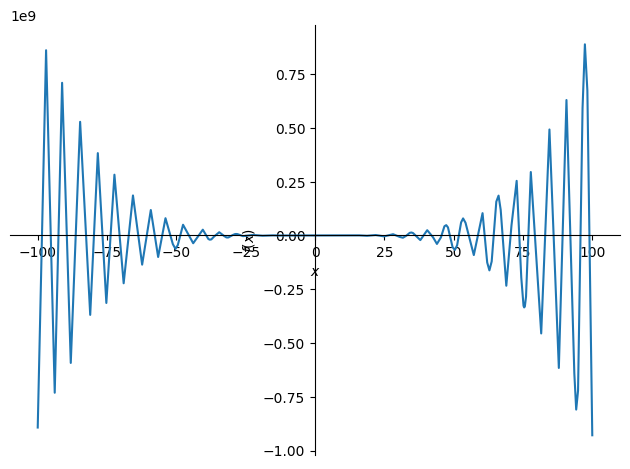

In [3]:
print('Построим график функции f(x) в диапазоне Х [-100, 100] при помощи библиотеки Sympy')
x = symbols('x')
plot(-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30, (x, -100, 100))

Построим график функции в диапазоне Х [-30, 30] при помощи библиотеки matplotlib.


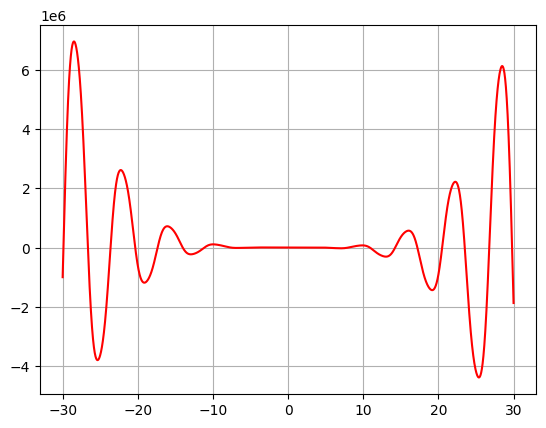

In [4]:
print('Построим график функции в диапазоне Х [-30, 30] при помощи библиотеки matplotlib.')
def f(x):
    y = -12*np.sin(np.cos(x))*x**4 - 18*x**3+5*x**2 + 10*x - 30
    return y    
list_x = [x for x in range(-30, 30, 1)]
list_y = []
for x in range(-30, 30, 1):
    y = round(f(x), 2)
    list_y.append(y)
dict_x_y = dict(zip(list_x, list_y))

x = np.arange(-30, 30, 0.01)
plt.plot(x, f(x), 'r-')
plt.grid()  

Корни уравнения в диапазоне X [13, 18]: [14.24, 17.19]
Координаты вершины: [16, 570863.04]


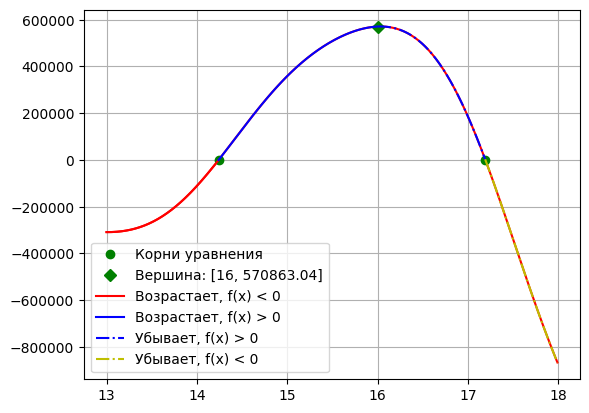

In [6]:
# Поскольку данная функция имеет большое количество корней, то для решения п.2-3 и 5-7
# рассмотрим график для дипапазона X [-4, 5]
funcrange = [13, 18]
leftnum = min(funcrange)
rightnum = max(funcrange)

 # Найдем корни уравнения на заданном участке.         
def solution():                                                 
    global leftnum, rightnum
    temp = leftnum
    rightnum = rightnum
    roots = []
    interval = []
    while temp < rightnum:
        if f(temp) >= 0 and f(temp + 1) <= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        if f(temp) <= 0 and f(temp + 1) >= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        if f(temp) > f(temp + 1) < f(temp + 2):
            interval.append(temp + 1)
        temp += 1
    roots = [round(i, 2) for i in roots]
    return roots
roots = solution()
print(f'Корни уравнения в диапазоне X [13, 18]: {roots}')
x = np.arange(13, 18, 0.01)
plt.plot(x, f(x), 'r-')  

# Обозначим точки пересечения с осью OX:
plt.plot(roots[0], 0, 'go', label = 'Корни уравнения') # Первый корень уравнения
plt.plot(roots[1], 0, 'go') # Второй корень уравнения
plt.grid()  

# Найдем координаты экстремума функции
x = np.arange(13, 18, 1)
max_y = max(f(x)) # Найдем максимальное значение Y на данном отрезке.
max_y = round(max(f(x)), 2) # Найдем максимальное значение Y на данном отрезке.
coord_max = []                   
for k, v in dict_x_y.items():    # Получив максимальное значение Y, через словарь координат найдем соответствующий ему Х.
    if v == max_y:
        coord_max.append(k) 
        coord_max.append(v)
        print(f'Координаты вершины: {coord_max}')  
plt.plot(coord_max[0], coord_max[1], 'gD', label = f'Вершина: [{coord_max[0]}, {coord_max[1]}]')

# Обозначим промежутки, на которых f > 0 & f < 0, а также возрастает и убывает
x = np.arange(13, roots[0], 0.01)
plt.plot(x, f(x), 'r-', label = 'Возрастает, f(x) < 0')

x = np.arange(roots[0], coord_max[0], 0.01)
plt.plot(x, f(x), 'b-', label = 'Возрастает, f(x) > 0') 

x = np.arange(coord_max[0], roots[1], 0.01)
plt.plot(x, f(x), 'b-.', label = 'Убывает, f(x) > 0') 

x = np.arange(roots[1],18, 0.01)
plt.plot(x, f(x), 'y-.', label = 'Убывает, f(x) < 0') 

plt.legend()     
 